<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/DimensionalityReduction_PCA_Application(Feature_Extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Application of PCA (Feature Extraction)

A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

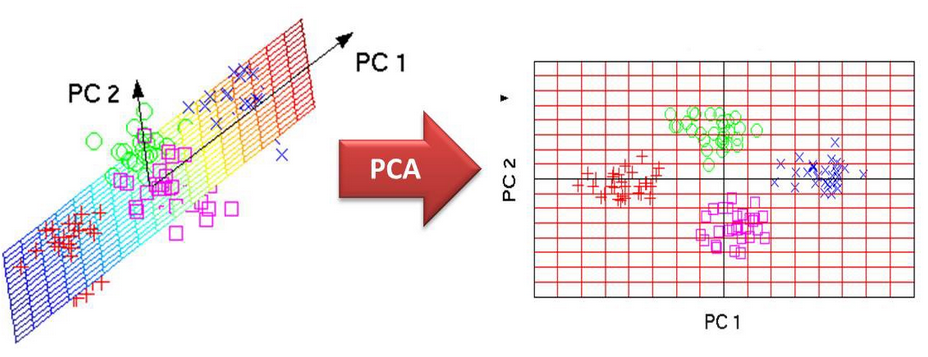


##import data, clean data, encode data, scale data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('/content/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
x=df.drop(columns=['Type'])
y=df['Type']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

##Fit PCA to get explained  variance ratio and its cumulative sum



In [6]:
#fit pca in train data and get variance ratio
pca=PCA()
pca.fit(sc_xtrain)
pca.explained_variance_ratio_

array([2.97953561e-01, 2.06577739e-01, 1.57093544e-01, 1.33576784e-01,
       1.00646739e-01, 5.51996719e-02, 4.09963275e-02, 7.75573030e-03,
       1.99903424e-04])

In [7]:
val=np.cumsum(pca.explained_variance_ratio_)*100
val

array([ 29.79535612,  50.45312998,  66.16248442,  79.52016279,
        89.58483669,  95.10480388,  99.20443663,  99.98000966,
       100.        ])

##Elbow plot for variance and dimensions

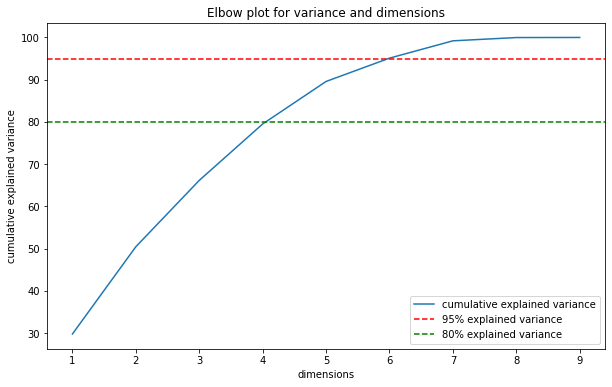

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(val)+1),val,label="cumulative explained variance")
plt.axhline(y=95,color="r",linestyle="--",label="95% explained variance")
plt.axhline(y=80,color="g",linestyle="--",label="80% explained variance")
plt.title("Elbow plot for variance and dimensions")
plt.xlabel("dimensions")
plt.ylabel("cumulative explained variance")
plt.legend()

##Check the plot where crosses dimensions

In [9]:
# fit pca on train dataset and transform both train and test
pca=PCA(n_components=0.95)
pca.fit(sc_xtrain)
pca_xtrain=pca.transform(sc_xtrain)
# pca_xtest=pca.transform(sc_xtest)

In [10]:
pca.n_components_

6

In [11]:
pca=PCA(n_components=6)
xtrain=pca.fit_transform(sc_xtrain)
xtest=pca.fit_transform(sc_xtest)

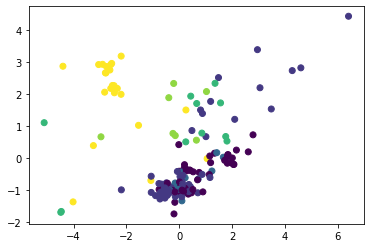

In [12]:
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)

In [15]:
model=LogisticRegression()
time1 =datetime.datetime.now()
model.fit(x,y)
time2 =datetime.datetime.now()
print(time2-time1)

0:00:00.048747


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
model=LogisticRegression()
time1 =datetime.datetime.now()
model.fit(xtrain,ytrain)
time2 =datetime.datetime.now()
print(time2-time1)

0:00:00.020705
